<a href="https://colab.research.google.com/github/ShrudhiChaudhary/CardioVascular-Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction_Shrudhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member  -**Shrudhi Chaudhary

# **Project Summary -**

### The project focuses on classifying whether the patient has a risk of cardiovascular coronary disease or not in the upcoming 10 years. There are 17 attributes and around 4000 columns so as to do the prediction. Various classification models like KNN , SVM , Logistic regression , Decision tree classifier have been used in order to get the best accuracy.

# **GitHub Link -**

Provide your GitHub Link here.



# **Problem Statement**


**Write Problem Statement Here.**
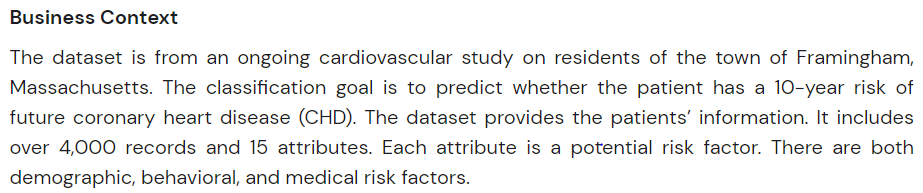

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,roc_curve

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

### Dataset First View

In [ ]:
# Dataset First Look
data = pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')
data.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

### Dataset Information

In [ ]:
# Dataset Info
data.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

There are 3390 rows and 17 attributes and we need to predict the Ten year CHD risk for the patients

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

In [ ]:
# Dataset Describe
data.describe()

### Variables Description 

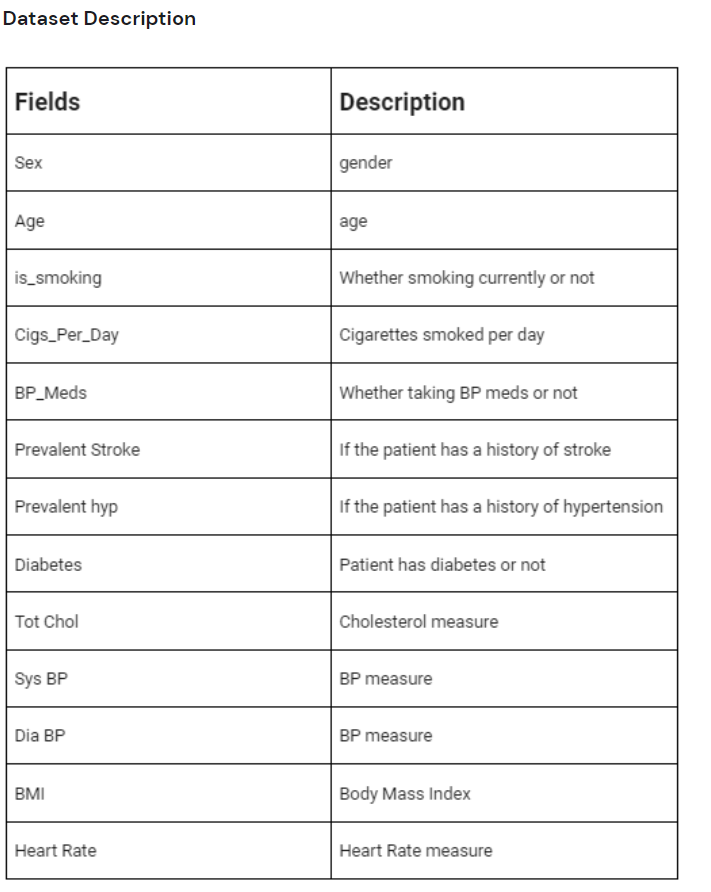

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
sns.set(rc={'figure.figsize':(7,7)})
sns.displot(data=data, x='education', kind="kde")

In [ ]:
df = data.fillna(method="ffill")
df

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
sns.displot(data=df, x='education', kind="kde")

In [ ]:
df.isnull().sum()

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
sns.displot(data=data, x='BMI', kind="kde")

In [ ]:
df1 = df.fillna(method="bfill")
df1

In [ ]:
df1.describe()

In [ ]:
df1.isnull().sum()

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
sns.countplot(x=df1['TenYearCHD'])

##### 1. Why did you pick the specific chart?

To study the count of classes in Ten year CHD 

##### 2. What is/are the insight(s) found from the chart?

The classes are imbalanced  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
ax = df1.groupby(['cigsPerDay'])['TenYearCHD'].mean().plot.bar(
    figsize = (18,7),
    fontsize = 14,
)

# Set the title
ax.set_title("Risk of CHD from cigarattes per day", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("cigsPerDay", fontsize = 15)
ax.set_ylabel("TenYearCHD", fontsize = 15)
plt.xticks(rotation = 0)

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df1['cigsPerDay'],color="y")

##### 1. Why did you pick the specific chart?

To study the variation of cigsper day with respect to CHD

##### 2. What is/are the insight(s) found from the chart?

Higher cigratters consumed have higher risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
sns.barplot(data=df1, x="cigsPerDay", y="TenYearCHD", hue="is_smoking")

##### 1. Why did you pick the specific chart?

To study co-relation of all 3 variables - cigsperday , CHD and is-smoking

##### 2. What is/are the insight(s) found from the chart?

Higher cigarattes per day have higher risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
ax = df1.groupby(['is_smoking'])['TenYearCHD'].mean().plot.bar(
    figsize = (18,7),
    fontsize = 14,
)

# Set the title
ax.set_title("Risk of CHD from cigarattes per day", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("is_smoking", fontsize = 15)
ax.set_ylabel("TenYearCHD", fontsize = 15)
plt.xticks(rotation = 0)

In [ ]:
ax = df1.groupby(['sex'])['TenYearCHD'].mean().plot.bar(
    figsize = (29,10),
    fontsize = 10,
)

# Set the title
ax.set_title("Risk of CHD estimation according to gender", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("sex", fontsize = 15)
ax.set_ylabel("TenYearCHD", fontsize = 15)
plt.xticks(rotation = 0)

##### 1. Why did you pick the specific chart?

To study the distribution of male and female with respect to CHD

##### 2. What is/are the insight(s) found from the chart?

Males has higher risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
ax = df1.groupby(['BPMeds'])['TenYearCHD'].mean().plot.bar(
    figsize = (18,7),
    fontsize = 14,
)

# Set the title
ax.set_title("Risk of CHD for patients taking BP medicine", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("BPMeds", fontsize = 15)
ax.set_ylabel("TenYearCHD", fontsize = 15)
plt.xticks(rotation = 0)

##### 1. Why did you pick the specific chart?

To study the variable BP medicine in accordance with CHD

##### 2. What is/are the insight(s) found from the chart?

Patients taking medicines of BP have higher risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 6

In [ ]:
# Chart - 6 visualization code prevalentStroke
ax = df1.groupby(['prevalentStroke'])['TenYearCHD'].mean().plot.bar(
    figsize = (18,7),
    fontsize = 14,
)

# Set the title
ax.set_title("Risk of CHD if there are any past Strokes", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("prevalentStroke", fontsize = 15)
ax.set_ylabel("TenYearCHD", fontsize = 15)
plt.xticks(rotation = 0)

##### 1. Why did you pick the specific chart?

To study the chances of CHD with respect to prevalent stroke in past

##### 2. What is/are the insight(s) found from the chart?

A patient already experienced stroke has high chances of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
ax = df1.groupby(['prevalentHyp'])['TenYearCHD'].mean().plot.bar(
    figsize = (18,7),
    fontsize = 14,
)

# Set the title
ax.set_title("Risk of CHD if there are any past cases of hypertension", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("prevalentHyp", fontsize = 15)
ax.set_ylabel("TenYearCHD", fontsize = 15)
plt.xticks(rotation = 0)

##### 1. Why did you pick the specific chart?

To study if a patient has a history of hyper-tension with respect to CHD

##### 2. What is/are the insight(s) found from the chart?

Patient having a history of hyper-tension has higher risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
ax = df1.groupby(['diabetes'])['TenYearCHD'].mean().plot.bar(
    figsize = (18,7),
    fontsize = 14,
)

# Set the title
ax.set_title("Risk of CHD if patient is suffering from diabetes", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("diabetes", fontsize = 15)
ax.set_ylabel("TenYearCHD", fontsize = 15)
plt.xticks(rotation = 0)

##### 1. Why did you pick the specific chart?

To study the levels of diabetes with respect to CHD

##### 2. What is/are the insight(s) found from the chart?

People with diabetes has higher risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
ax = df1.groupby(['totChol'])['TenYearCHD'].mean().plot.bar(
    figsize = (29,10),
    fontsize = 10,
)

# Set the title
ax.set_title("Risk of CHD estimation from total cholestrol", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("totChol", fontsize = 15)
ax.set_ylabel("TenYearCHD", fontsize = 15)
plt.xticks(rotation = 90)

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df1['totChol'],color="y")

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df1.totChol),color="y")

##### 1. Why did you pick the specific chart?

To study variation of total cholestrol with respect to CHD

##### 2. What is/are the insight(s) found from the chart?

Higher level of cholestrol has higher risk to CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
ax = df1.groupby(['sysBP'])['TenYearCHD'].mean().plot.bar(
    figsize = (29,10),
    fontsize = 10,
)

# Set the title
ax.set_title("Risk of CHD estimation from BP reading", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("sysBP", fontsize = 15)
ax.set_ylabel("TenYearCHD", fontsize = 15)
plt.xticks(rotation = 90)

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df1['sysBP'],color="y")

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df1.sysBP),color="y")

##### 1. Why did you pick the specific chart?

To study the variation of systolic BP in accordance to CHD

##### 2. What is/are the insight(s) found from the chart?

Higher systolic pressure has higher risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 11

In [ ]:
sns.violinplot(x = 'TenYearCHD', y = 'BMI', data = df1, size = 8)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df1['BMI'],color="y")

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df1.BMI),color="y")

##### 1. Why did you pick the specific chart?

To study the variation of BMI with respect to CHD

##### 2. What is/are the insight(s) found from the chart?

Higher variation of BMI is seen between 20-30

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
ax = df1.groupby(['heartRate'])['TenYearCHD'].mean().plot.bar(
    figsize = (29,10),
    fontsize = 10,
)

# Set the title
ax.set_title("Risk of CHD estimation according to heart rate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("heartRate", fontsize = 15)
ax.set_ylabel("TenYearCHD", fontsize = 15)
plt.xticks(rotation = 90)

##### 1. Why did you pick the specific chart?

To study the variation of heart rate according to the risk of CHD for 10 years

##### 2. What is/are the insight(s) found from the chart?

Higher heart rate have higher risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
ax = df1.groupby(['glucose'])['TenYearCHD'].mean().plot.bar(
    figsize = (29,10),
    fontsize = 10,
)

# Set the title
ax.set_title("Risk of CHD estimation according to glucose level", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("glucose", fontsize = 15)
ax.set_ylabel("TenYearCHD", fontsize = 15)
plt.xticks(rotation = 90)

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df1['glucose'],color="y")

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df1.glucose),color="y")

##### 1. Why did you pick the specific chart?

To study the variation of glucose according to the risk of CHD for 10 years

##### 2. What is/are the insight(s) found from the chart?

Higher glucose have higher risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative insights

#### Chart - 14 - Correlation Heatmap

In [ ]:
df2 = df1

In [ ]:
df2.head()

In [ ]:
df2['sex_F'] = np.where(df2['sex']=='F', 1, 0)
df2['sex_M'] = np.where(df2['sex']=='M', 1, 0)
df2.drop(columns=['sex'],axis=1,inplace=True)

In [ ]:
df2['smoke_yes'] = np.where(df2['is_smoking']=='YES', 1, 0)
df2['smoke_no'] = np.where(df2['is_smoking']=='NO', 1, 0)
df2.drop(columns=['is_smoking'],axis=1,inplace=True)

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
correlation = df2.corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')

##### 1. Why did you pick the specific chart?

To study the co-relation between different variables

##### 2. What is/are the insight(s) found from the chart?

Few variables are highly co-related

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df1.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

For some values the mean or mode couldn't be used so we have filled the null values by considering the rows above and below the rows with null values

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df2.plot(kind="box",subplots=True,layout=(12,2),figsize=(25,30))

In [ ]:
#Using Quantile Method
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df2.shape)
sns.boxplot(df2['cigsPerDay'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
max_val = df2.cigsPerDay.quantile(0.95)
min_val = df2.cigsPerDay.quantile(0.05)

df3 = df2
df3['cigsPerDay'] = np.where(df3['cigsPerDay']>max_val,max_val,df3['cigsPerDay'])

print("Shape After Removing Outliers:", df3.shape)

sns.boxplot(df3['cigsPerDay'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df2.shape)
sns.boxplot(df2['totChol'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
max_val = df2.totChol.quantile(0.95)
min_val = df2.totChol.quantile(0.05)

df3 = df2
df3['totChol'] = np.where(df3['totChol']>max_val,max_val,df3['totChol'])

print("Shape After Removing Outliers:", df3.shape)

sns.boxplot(df3['totChol'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df2.shape)
sns.boxplot(df2['sysBP'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
max_val = df2.sysBP.quantile(0.95)
min_val = df2.sysBP.quantile(0.05)

df3 = df2
df3['sysBP'] = np.where(df3['sysBP']>max_val,max_val,df3['sysBP'])

print("Shape After Removing Outliers:", df3.shape)

sns.boxplot(df3['sysBP'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df2.shape)
sns.boxplot(df2['diaBP'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
max_val = df2.diaBP.quantile(0.95)
min_val = df2.diaBP.quantile(0.05)

df3 = df2
df3['diaBP'] = np.where(df3['diaBP']>max_val,max_val,df3['diaBP'])

print("Shape After Removing Outliers:", df3.shape)

sns.boxplot(df3['diaBP'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df2.shape)
sns.boxplot(df2['BMI'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
max_val = df2.BMI.quantile(0.95)
min_val = df2.BMI.quantile(0.05)

df3 = df2
df3['BMI'] = np.where(df3['BMI']>max_val,max_val,df3['BMI'])

print("Shape After Removing Outliers:", df3.shape)

sns.boxplot(df3['BMI'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df2.shape)
sns.boxplot(df2['heartRate'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
max_val = df2.heartRate.quantile(0.95)
min_val = df2.heartRate.quantile(0.05)

df3 = df2
df3['heartRate'] = np.where(df3['heartRate']>max_val,max_val,df3['heartRate'])

print("Shape After Removing Outliers:", df3.shape)

sns.boxplot(df3['heartRate'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df2.shape)
sns.boxplot(df2['glucose'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
max_val = df2.glucose.quantile(0.95)
min_val = df2.glucose.quantile(0.05)

df3 = df2
df3['glucose'] = np.where(df3['glucose']>max_val,max_val,df3['glucose'])

print("Shape After Removing Outliers:", df3.shape)

sns.boxplot(df3['glucose'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

By using the Quantile method I have removed the outliers. Using this method makes it easier to visualize the outliers and remove them accordingly

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
categorical_features = df1.describe(include=['object','category']).columns

In [ ]:
for col in categorical_features:
    counts = df1[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='maroon')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding has been used here in order to make it easier to fit to the model

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df3['totBP'] = df3['sysBP'] - df3['diaBP'] 
df3.drop(columns=['sysBP','diaBP'],axis=1,inplace=True)

In [ ]:
df3.head()

In [ ]:
df3.drop(columns = ['smoke_yes','smoke_no'],axis = 1, inplace = True)
df3.head()

In [ ]:
plt.figure(figsize=(15,8))
correlation = df3.corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df3[[i for i in df3.describe().columns if i not in ['TenYearCHD','id']]])

In [ ]:
features = ['age','education','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','BMI','heartRate','glucose','sex_F','sex_M','totBP']
features

##### What all feature selection methods have you used  and why?

Variance Inflation Factor is used to remove the multicollinearity between the highly co-related independent variables.

##### Which all features you found important and why?

All the features listed in features are found to be the most important because their VIF value is optimal , although if we inlcude all the features then also the VIF value is not much deviated, so we can also consider all the independent variables.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Not required

### 6. Data Scaling

In [ ]:
# Scaling your data
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)   

##### Which method have you used to scale you data and why?

I have used StandardScaler to scale the data. It is one of the most common ways of scaling data, it use the z-score formula which makes the data normally distributed with mean = 0 and std = 1.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No , not required

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
dependent_var = 'TenYearCHD'
independent_var = ['age','education','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','BMI','heartRate','glucose','sex_F','sex_M','totBP']

In [ ]:
X = df4[independent_var]
y = df4[dependent_var]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [ ]:
X_train

##### What data splitting ratio have you used and why? 

70% for training and 30% for testing is splitted accordingly. Most common used ratio for splitting the training and testing set. Anythingmore or less can hinder the accuracy of the model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes I think data is imbalanced by looking to the count of both the classes

In [ ]:
sns.countplot(x=df1['TenYearCHD'])

In [ ]:
df3.head()

In [ ]:
df4 = df3.reindex(columns = [col for col in df3.columns if col != 'TenYearCHD'] + ['TenYearCHD'])
df4

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

X_tl, y_tl = tl.fit_resample(df4.iloc[:,0:-1], df4['TenYearCHD'])

print('Original dataset shape:', len(df4))
print('Resampled dataset shape', len(y_tl))

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Undersampling method has been used here with Tomek links. Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Tomek’s link exists if the two samples are the nearest neighbors of each other.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
# Fit the Algorithm
chd_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=15, random_state=0)
chd_classifier.fit(X_train, y_train)

In [ ]:
# Predict on the model
y_predicted = chd_classifier.predict(X_test)

In [ ]:
y_predicted[:10]

In [ ]:
y_test[:10]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
accuracy_score(y_test, y_predicted) * 100

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80, 100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

classifier.fit(X_train, y_train)

In [ ]:
# Predict on the model
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:
accuracy_score(y_train,train_preds)*100

In [ ]:
accuracy_score(y_test,test_preds)*100

##### Which hyperparameter optimization technique have you used and why?

Grid Search Cross Fold validation has been used in order to tune the hyper-parameter. This method involves specifying a set of possible values for each hyper-parameter and training the model for each combination of hyper-parameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there has been a considerable improvement in the testing accuracy after hyper-parameter tunning.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 3 Implementation
# Fit the Algorithm
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

In [ ]:
# Predict on the model
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
X_test

In [ ]:
test_preds

In [ ]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
train_accuracy = accuracy_score(train_class_preds,y_train)*100
test_accuracy = accuracy_score(test_class_preds,y_test)*100

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
logistic = LogisticRegression()
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

In [ ]:
train_accuracy = max(scores['train_accuracy']*100)

In [ ]:
test_accuracy = max(scores['test_accuracy']*100)

In [ ]:
print('Training accuracy is :',train_accuracy)
print('Testing accuracy is :',test_accuracy)

##### Which hyperparameter optimization technique have you used and why?

Grid Search CV has been used. This method involves specifying a set of possible values for each hyper-parameter and training the model for each combination of hyper-parameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There has been some improvement but not much as such. 

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

However when compare the training and testing accuracy , we can conclude that the testing accuarcy is slightly more than training and so the model is trained in a good way to estimate the price values

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

In [ ]:
knn.score(X_test,y_test)*100

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [ ]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,40)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=7)
knn_cv.fit(X,y)

In [ ]:
(knn_cv.best_score_)*100

In [ ]:
knn_cv.best_params_

##### Which hyperparameter optimization technique have you used and why?

Grid search - This method involves specifying a set of possible values for each hyper-parameter and training the model for each combination of hyper-parameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there has been a considerable improvement after hyper-parameter tunning and it is evaluated above

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The AUC_ROC curve can be considered for a positive business impact. Although we have compared the training and testing accuracy to judge the model in terms of business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Logistic Regression is considered for final prediction as the testing and training accuracy have a satisfied value and models are not overfitted. Almost all models have near or same accuracy 

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
pip install shap

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import shap 
import graphviz
sns.set_style('darkgrid') 

In [ ]:
# Visualize how model classified the entire data
tree_graph = export_graphviz(chd_classifier, out_file=None, feature_names = X.columns, rounded=True, filled=True)
graphviz.Source(tree_graph)

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(chd_classifier)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_test[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[0]) 

In [ ]:
# Obtain a Scatter Summary Plot 
shap_values = shap.TreeExplainer(chd_classifier).shap_values(X_test)
shap.summary_plot(shap_values[0], X_test)

In [ ]:
import lime
from lime import lime_tabular
 
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X),
    feature_names=X.columns,
    class_names=['Not at risk','At risk'],
    mode='classification'
)

In [ ]:
exp = explainer.explain_instance(
    data_row=X.iloc[1], 
    predict_fn=clf.predict_proba
)
 
exp.show_in_notebook(show_table=True)

I have used LIME i.e Local Interpretable Model-Agnostic Explanations and SHAP i.e Shapley Additive Explanations for model explainability and feature importance  

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

## The Logistic Regression model is best suited for this model and considered to be the most accurate for this classification model. Hence such algorithms can be used to predict some set of data while using classification. Other models used like KNN and SVM and Decision tree also gave some good results but not as high as Logistic regressor. Hyper-parameter tunning has helped to improve the model further.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***